In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")

Loaded Libraries


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#

In [3]:
def points_plot(ax, Xtr, Xte, ytr, yte, 
                clf, 
                mesh = True, colorscale = cmap_light, cdiscrete = cmap_bold, 
                alpha = 0.1, psize = 10, 
                zfunc = False, predicted = False):
#
# note: this function only works for X.shape = (:, 2)
# it is intended to illustrate the classifier boundary
#
# get the column names if they exist to apply
# to the meshed data generated below
#
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#
    h = 0.02
#
# create a uniform grid spanning the range of the X values
# note that y here is NOT the target, it is the 2nd
# dimension of the desired plot
#
    X = np.concatenate((Xtrain, Xtest))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
#
# predict the target value at each point in the grid
#
# this method uses the probabilities from the classifier
# and applies a function to determine the class
#
    if zfunc:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                         columns = feature_names)
        p0 = clf.predict_proba(mesh_data)[:, 0]
        p1 = clf.predict_proba(mesh_data)[:, 1]
        Z = zfunc(p0, p1)
#
# this method uses the classifier to predict the classes directly
#
    else:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                                     columns = feature_names)
        Z = clf.predict(mesh_data)
    ZZ = Z.reshape(xx.shape)
#
# plt.pcolormesh() creates a shaded result over the grid
#
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, 
                       cmap = cmap_light, 
                       alpha = alpha, 
                       axes = ax, 
                       shading = 'auto')
#
# add the points to the plot
# these can be the original target values
# or the predicted values
#
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
#
# plot training points
#
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], 
               c = showtr - 1, 
               cmap = cmap_bold, 
               s = psize, 
               alpha = alpha, 
               edgecolor = "k")
#    
# plot testing points
#
    ax.scatter(Xtest[:, 0], Xtest[:, 1],
               c = showte - 1, 
               cmap = cmap_bold, 
               s = psize + 10,
               alpha = alpha, 
               marker = "s")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#
    return ax, xx, yy

In [4]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, 
                     clf, colorscale = cmap_light, cdiscrete = cmap_bold, 
                     ccolor = cm, 
                     alpha = 0.1, psize = 10):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#    
    ax, xx, yy = points_plot(ax, Xtr, Xte, ytr, yte,
                         clf,
                         mesh = False, 
                         colorscale = colorscale, cdiscrete = cdiscrete, 
                         psize = psize, alpha = alpha,
                         predicted = True) 
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if feature_names is not None:
        mesh_data = pd.DataFrame(mesh_data, 
                     columns = feature_names)    
    Z = clf.predict_proba(mesh_data)[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = ccolor, alpha = 0.2)
    cs2 = plt.contour(xx, yy, Z, cmap = ccolor, alpha = 0.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 12)
#
    plt.show()

In [5]:
dflog = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/sample.csv')

# Change num values > 0 to 1 for a Diagnosis to get our data ready for the next steps.
dflog['num'] = np.where((dflog['num']>0),1,0)

#
print('The data have ', dflog.shape[0], ' rows and ', dflog.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(dflog.columns)))

The data have  297  rows and  14  columns

column names: 

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num


In [6]:
dflog.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


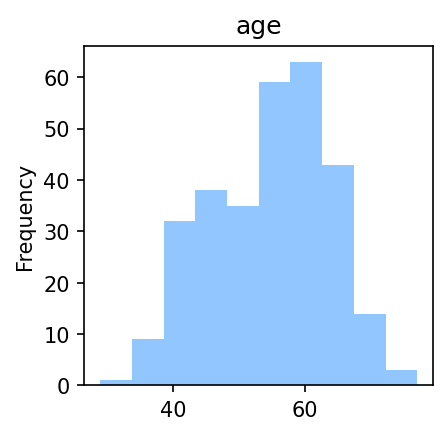

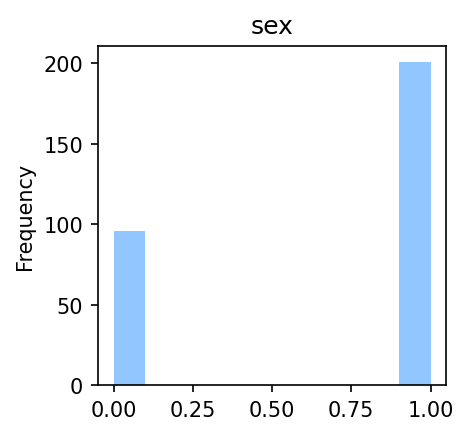

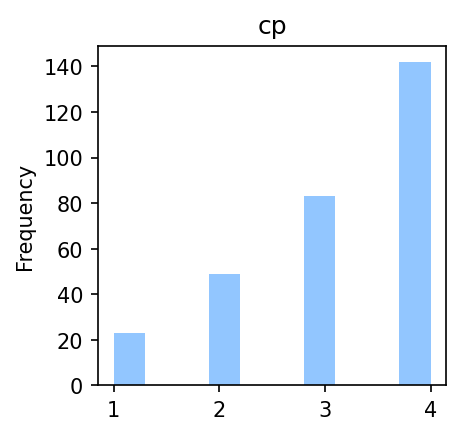

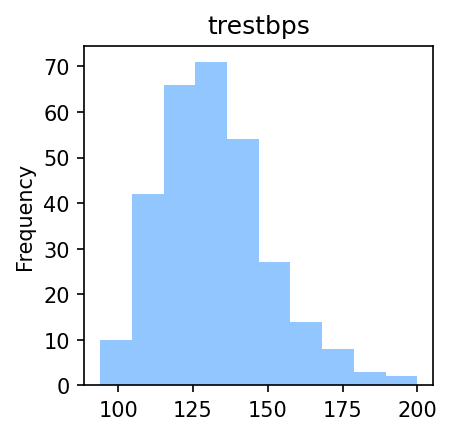

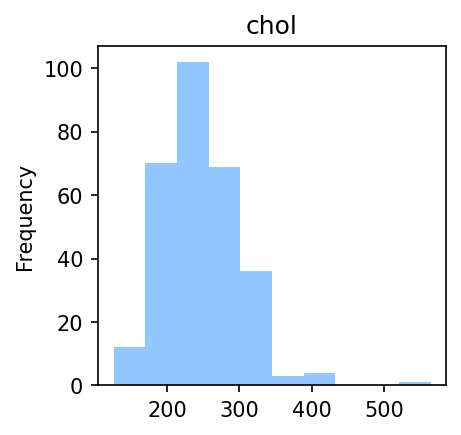

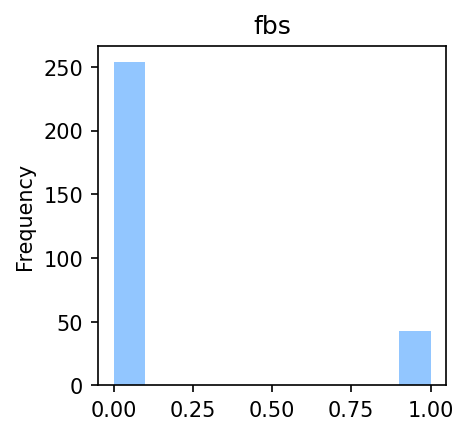

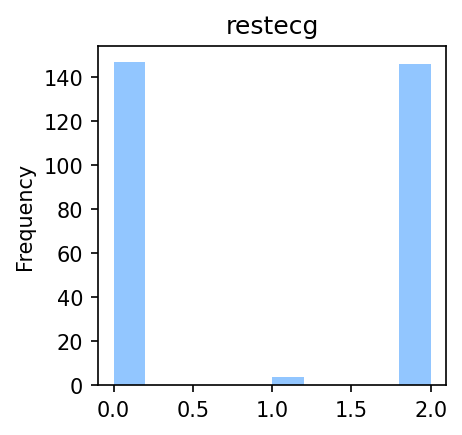

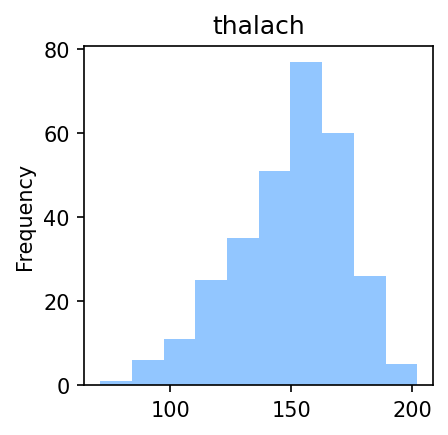

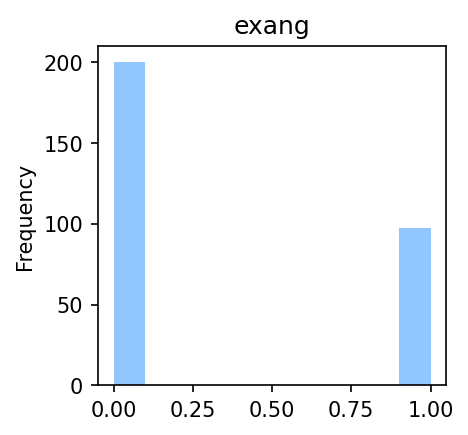

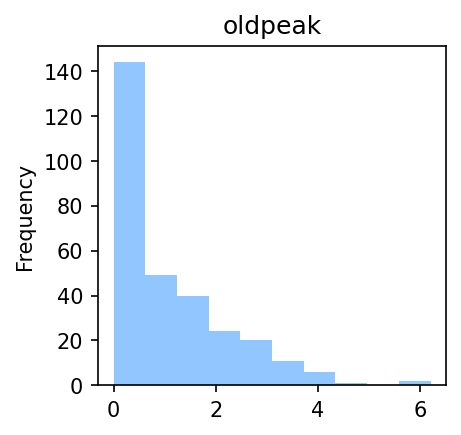

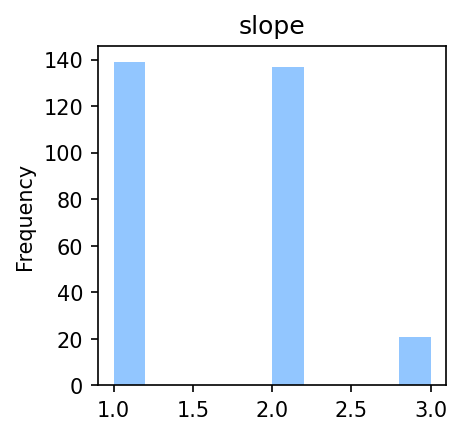

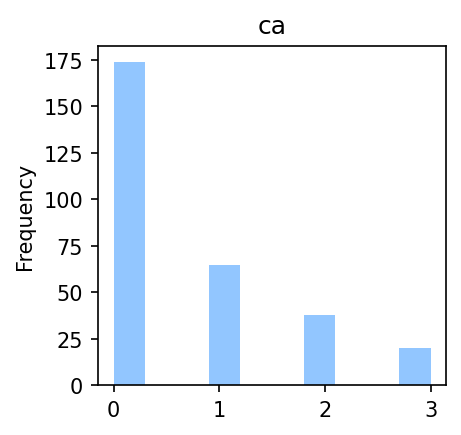

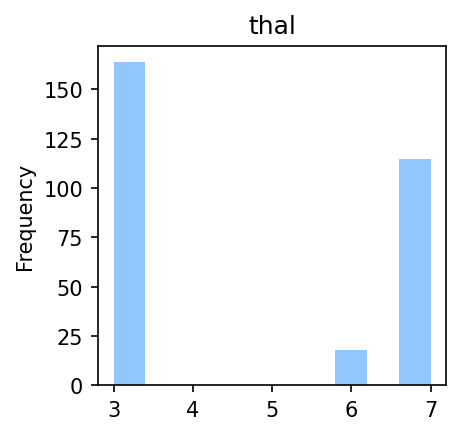

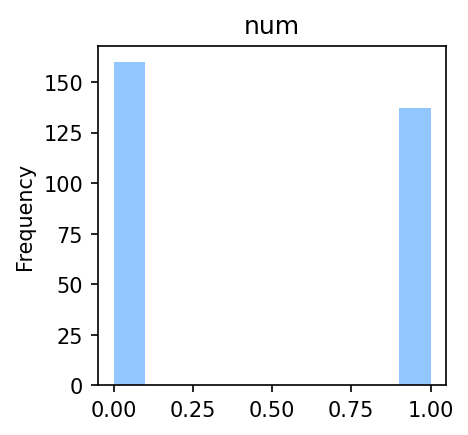

In [8]:
for col in list(dflog.columns):
    dflog[col].plot(kind = 'hist', title = col)
    plt.show()

In [10]:
#
# extract the age as a Series, and inspect the values
#
x = dflog['age']
print('first 6 lines of age data:\n', x.head(6))
print('\nsummary statistics of age:\n', x.describe())

first 6 lines of age data:
 0    63
1    67
2    67
3    37
4    41
5    56
Name: age, dtype: int64

summary statistics of age:
 count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


In [11]:
#
# do the same for the resting blood pressure
#
y = dflog['trestbps']
print('first six lines of blood pressure data:\n', y.head(6))
print('\nsummary statistics of blood pressure:\n', y.describe())

first six lines of blood pressure data:
 0    145
1    160
2    120
3    130
4    130
5    120
Name: trestbps, dtype: int64

summary statistics of blood pressure:
 count    297.000000
mean     131.693603
std       17.762806
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


In [14]:
categorical_features = ['sex',
                        'cp',
                        'restecg',
                        'slope',
                        'thal']
dflog = pd.get_dummies(dflog, columns = categorical_features)
print('The data have ', dflog.shape[0], ' rows and ', dflog.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(dflog.columns)))

The data have  297  rows and  24  columns

column names: 

age
trestbps
chol
fbs
thalach
exang
oldpeak
ca
num
sex_0
sex_1
cp_1
cp_2
cp_3
cp_4
restecg_0
restecg_1
restecg_2
slope_1
slope_2
slope_3
thal_3
thal_6
thal_7


In [15]:
class_counts = dflog['num'].value_counts()
class_counts

0    160
1    137
Name: num, dtype: int64

In [16]:
type(class_counts)

pandas.core.series.Series

In [17]:
class_percentages = pd.Series([(x / dflog.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    53.872054
1    46.127946
dtype: float64

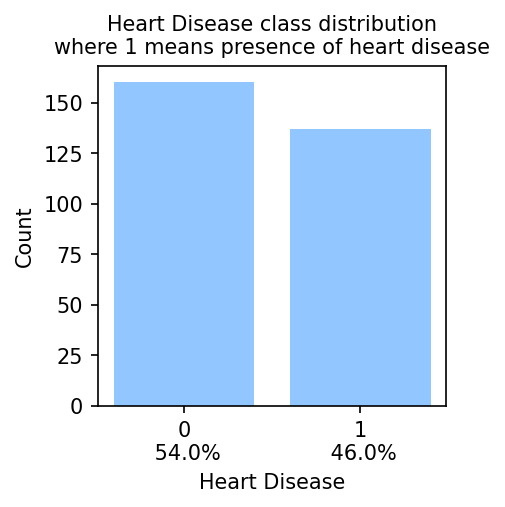

In [18]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease',
              fontsize = 10)
plt.show()

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dflog[['chol','trestbps']],
                                                dflog['num'],
                                                train_size = 0.80,
                                                random_state = 42)

In [22]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 1000, C = 1000)

In [23]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=1000, solver='liblinear')

In [24]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy on training data: 0.57


In [25]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')

Accuracy on test data: 0.55


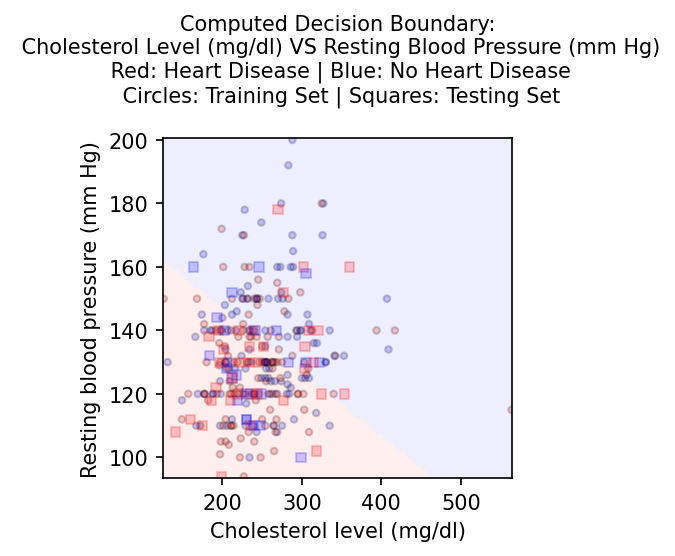

In [26]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
ax.set_title('Computed Decision Boundary:\n ' +
             'Cholesterol Level (mg/dl) VS Resting Blood Pressure (mm Hg)' +
             '\n Red: Heart Disease | Blue: No Heart Disease' +
             '\n Circles: Training Set | Squares: Testing Set\n',
            fontsize = 10)
_ = points_plot(ax, Xtrain, Xtest, ytrain, ytest, classifier, alpha = 0.2)

In [27]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       124
           1       0.56      0.42      0.48       113

    accuracy                           0.57       237
   macro avg       0.57      0.56      0.56       237
weighted avg       0.57      0.57      0.56       237



In [28]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        36
           1       0.42      0.33      0.37        24

    accuracy                           0.55        60
   macro avg       0.52      0.51      0.51        60
weighted avg       0.53      0.55      0.54        60



In [33]:
X = dflog.drop(columns = ['num'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (297, 23)


In [34]:
y = dflog['num']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (297,)


In [35]:
list(X.columns)

['age',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'ca',
 'sex_0',
 'sex_1',
 'cp_1',
 'cp_2',
 'cp_3',
 'cp_4',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'slope_1',
 'slope_2',
 'slope_3',
 'thal_3',
 'thal_6',
 'thal_7']

In [36]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  222  rows
 and the corresponding labels have an equal number of values. (222)
Test split has  75  rows
 and the corresponding labels have an equal number of values. (75)


(*) sklearn.model_selection.train_test_split

(+) docs.python.org pickle

In [37]:
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('% heart disease (where 1 means presence of heart diseases):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

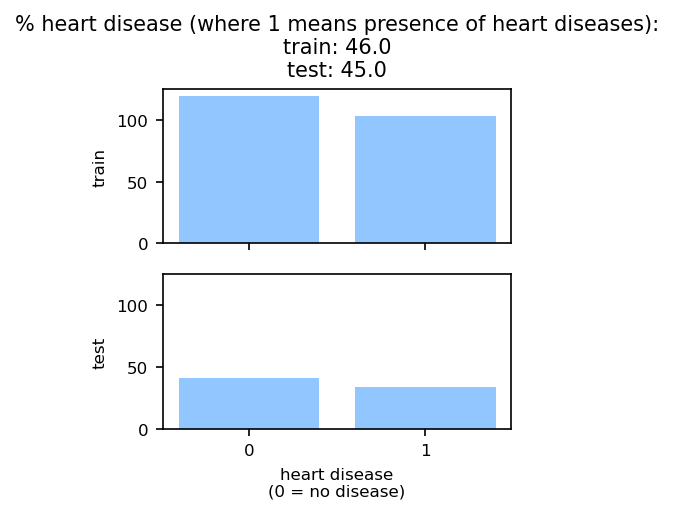

In [38]:
plot_y_ratios(ylr, ytestlr)

(*) sklearn.model_selection.train_test_split

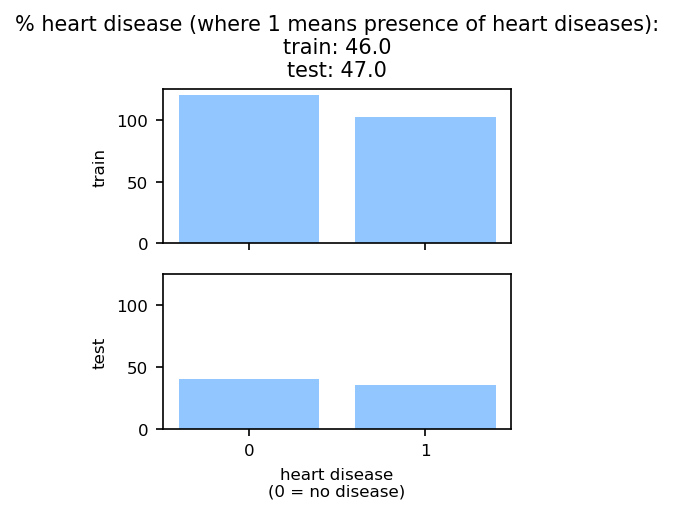

In [39]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, 
                                                                  random_state = 2, 
                                                                  stratify = y)
plot_y_ratios(ylrstrat, ytestlrstrat)

(*) sklearn.linear_model.LogisticRegression

In [42]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 1000)

In [43]:
clf.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=1000, solver='newton-cg')

In [44]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [45]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.81


Note the order in which the parameters should be passed according to the documentation ... although in this case there is no difference since it is a one-to-one comparison

ref: sklearn.metrics.accuracy_score

In [46]:
print("[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order]", 
      f'{accuracy_score(ytestlrstrat, y_predict_test):.2f}')

[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.81


In [47]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.87


(*) sklearn.ensemble.RandomForestClassifier

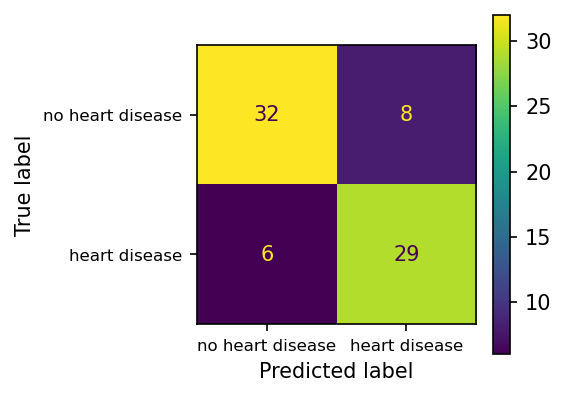

In [48]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

In [49]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       120
           1       0.88      0.83      0.85       102

    accuracy                           0.87       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.87      0.87      0.87       222



In [50]:

print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.78      0.83      0.81        35

    accuracy                           0.81        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.81      0.81      0.81        75



In [51]:

# here we try multiple splits and see the effects, with the same proportion 75% train and 25% test
#
# keep lists for training accuracy, 
#                test accuracy, 
#                and the difference between the latter and the former
#
training_accuracy = []
test_accuracy = []
accuracy_difference = []
#
# define number of trials
#
n_splits = 25
#
# define LogisticRegression object
#
clf = LogisticRegression(solver = 'newton-cg', max_iter = 1000)
#
# loop over multiple trials
#
for i in range(0, n_splits):
#
# perform a split for this iteration, 
# using different random_state for every iteration
# this ensures each split is likely to be unique
#
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = i)
#    
# fit the Classifier on the training set
#
    clf.fit(Xlr, ylr)
#
# predict the labels for the training data
#
    y_predict_training = clf.predict(Xlr)
#
# predict the labels for the test data
#
    y_predict_test = clf.predict(Xtestlr)
#
# save training set accuracy for this split
#
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
#
# save test set accuracy for this split
#
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
#
# save difference between the two acuracy values
#
    accuracy_difference.append(tst_accuracy - tr_accuracy)

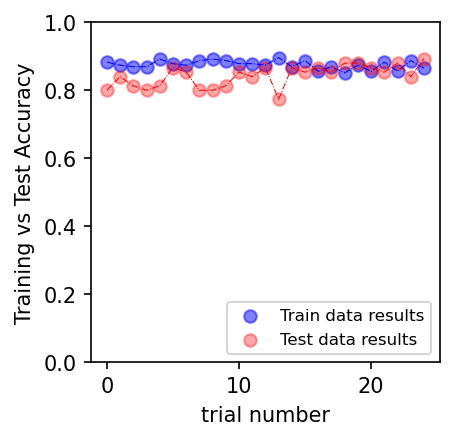

In [52]:
fig, ax = plt.subplots()
ax.scatter(range(len(training_accuracy)),
           training_accuracy, 
           color = 'blue', 
           alpha = 0.5,
           label = 'Train data results')
ax.plot(range(len(training_accuracy)),
        training_accuracy, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_accuracy)),
           test_accuracy, 
           color = 'red', 
           alpha = 0.35, 
           label = 'Test data results')
ax.plot(range(len(test_accuracy)),
        test_accuracy, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Training vs Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

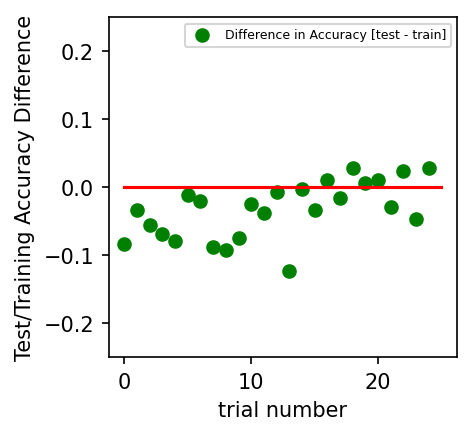

In [53]:
fig, ax = plt.subplots()
ax.scatter(range(len(accuracy_difference)),
           accuracy_difference, 
           color = 'green', 
           label = 'Difference in Accuracy [test - train]')
ax.plot([0, len(accuracy_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test/Training Accuracy Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()

In [54]:
print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))
#
print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       120
           1       0.88      0.82      0.85       102

    accuracy                           0.86       222
   macro avg       0.87      0.86      0.86       222
weighted avg       0.87      0.86      0.86       222

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.94      0.83      0.88        35

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



In [55]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [69]:
def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True,
                             random_state = 42).split(x):
        clf.fit(x.loc[train, :], y[train])
        result += score_func(clf.predict(x.loc[test, :]), y[test])
    return result / nfold

In [58]:
clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
score = cv_score(clf, Xlr, ylr)
print(f'{score:.2f}')

0.81


Checkup Exercise Set II

In [59]:
 the grid of parameters to search over
#
Cs = [0.001, 0.1, 1, 10, 100]
#
# your turn
for i in Cs:
    clf = LogisticRegression(C=i)
    score = cv_score(clf, Xlr, ylr)
    print(f'C-values: {i} \n Score: {round(score,4)} \n')
    
print('The C with the highest average value is any value from 0.1 to 100')

SyntaxError: invalid syntax (3898510442.py, line 1)

Checkup Exercise Set III

In [60]:
#
# your turn
#
clf_new = LogisticRegression(C=0.1)
clf_new.fit(Xlr,ylr)
accuracy_new = accuracy_score(clf.predict(Xtestlr), ytestlr)
print(f'The new accuracy score is {accuracy_new}')

The new accuracy score is 0.92


/Users/aquinojoeanson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# your turn
#
from sklearn.model_selection import GridSearchCV

PARAMS = [0.001, 0.1, 1, 10, 100]
grid_cv = GridSearchCV(estimator = LogisticRegression(),cv = 5,
                       param_grid = {'C': PARAMS})
grid_cv.fit(Xlr, ylr)
grid_accuracy = accuracy_score(grid_cv.predict(Xtestlr), ytestlr)
print(f'The new accuracy score with GridSearch is {grid_accuracy}')
print(f'GridSearch best C: {grid_cv.best_params_}')

/Users/aquinojoeanson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aquinojoeanson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

The new accuracy score with GridSearch is 0.8933333333333333
GridSearch best C: {'C': 0.1}


/Users/aquinojoeanson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aquinojoeanson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [62]:
The new accuracy score with GridSearch is 0.8970588235294118
GridSearch best C: {'C': 1}

SyntaxError: invalid syntax (2011902068.py, line 1)

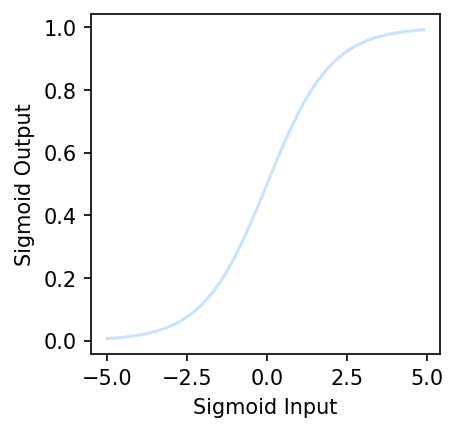

In [63]:
h = lambda z: 1. / (1 + np.exp(-z))
zs = np.arange(-5, 5, 0.1)
fig, ax = plt.subplots()
ax.plot(zs, h(zs), alpha=0.5)
ax.set_ylabel('Sigmoid Output')
ax.set_xlabel('Sigmoid Input')
plt.show()

In [64]:
clf.predict_proba(Xtestlr)

array([[0.1624078 , 0.8375922 ],
       [0.15026013, 0.84973987],
       [0.90094305, 0.09905695],
       [0.87584021, 0.12415979],
       [0.05610963, 0.94389037],
       [0.81199556, 0.18800444],
       [0.4666111 , 0.5333889 ],
       [0.55011849, 0.44988151],
       [0.00602007, 0.99397993],
       [0.68348661, 0.31651339],
       [0.54882306, 0.45117694],
       [0.97022082, 0.02977918],
       [0.68466615, 0.31533385],
       [0.05493811, 0.94506189],
       [0.5311578 , 0.4688422 ],
       [0.10366531, 0.89633469],
       [0.03893703, 0.96106297],
       [0.79196622, 0.20803378],
       [0.00443177, 0.99556823],
       [0.85175702, 0.14824298],
       [0.71750121, 0.28249879],
       [0.00478601, 0.99521399],
       [0.87709167, 0.12290833],
       [0.35895274, 0.64104726],
       [0.92227356, 0.07772644],
       [0.72182959, 0.27817041],
       [0.96506827, 0.03493173],
       [0.65159359, 0.34840641],
       [0.26321812, 0.73678188],
       [0.67735891, 0.32264109],
       [0.

In [66]:
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(dflog[['chol','trestbps']],
                     dflog['num'],
                     train_size = 0.80,
                     random_state = 42)
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

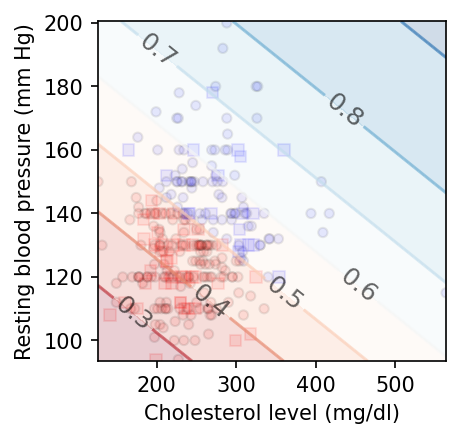

In [67]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
_ = points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, classifier, psize = 20, alpha = 0.1)

$$Discriminative vs Generative Classifiers